In [1]:
import pandas as pd
import matplotlib.pyplot as plt
filename= input('Nhập file: ')
df=pd.read_csv(filename)
df

Nhập file: sales2019_1.csv


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
9718,150497,20in Monitor,1,109.99,01/26/19 19:09,"95 8th St, Dallas, TX 75001"
9719,150498,27in FHD Monitor,1,149.99,01/10/19 22:58,"403 7th St, San Francisco, CA 94016"
9720,150499,ThinkPad Laptop,1,999.99,01/21/19 14:31,"214 Main St, Portland, OR 97035"
9721,150500,AAA Batteries (4-pack),2,2.99,01/15/19 14:21,"810 2nd St, Los Angeles, CA 90001"


### 1. Ngày có doanh số nhiều nhất và thấp nhất

In [2]:
#Thêm cột "Ngày" để trích xuất theo ngày
df['Date']=df['Order Date'].str[3:5]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25


In [3]:
#Xử lí các giá trị 'nan', 'er'
df=df.dropna(how='all')
df=df[df['Date']!='er']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",25


In [4]:
print(set(df['Date']))

{'10', '04', '08', '26', '13', '24', '02', '15', '25', '20', '28', '12', '01', '07', '29', '19', '21', '17', '05', '14', '23', '27', '18', '31', '06', '16', '22', '09', '30', '11', '03'}


In [5]:
#Ngày có doanh số cao nhất (tạo ra cột sales để tính doanh thu)
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'],
                                     downcast='integer')
df['Price Each']= pd.to_numeric(df['Price Each'],
                               downcast='float')



In [6]:
df['Sales']=df['Quantity Ordered']*df['Price Each']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,11.990000


In [7]:
#Di chuyển cột Sales sau cột Price Each cho dễ nhìn
moving_Sales=df.pop('Sales')
df.insert(4,'Sales', moving_Sales)
df.head()
#Dùng numeric để đổi kiểu object thành...Sau đó di chuyển cột Sales lên sau cột Price Each 

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Date
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",25


In [8]:
#Lọc dữ liệu theo từng ngày và tính tổng doanh thu theo ngày
df.groupby('Date').sum()['Sales']

Date
01    67430.617188
02    70813.203125
03    47046.199219
04    62012.210938
05    46524.628906
06    52777.488281
07    53676.417969
08    56112.468750
09    55153.128906
10    56660.917969
11    78414.539062
12    48126.410156
13    61284.390625
14    50090.480469
15    64869.320312
16    51305.000000
17    55152.750000
18    48469.738281
19    56964.730469
20    68084.882812
21    60948.289062
22    59380.917969
23    57572.449219
24    55848.859375
25    57721.488281
26    71476.179688
27    63683.968750
28    57419.480469
29    61692.210938
30    56238.609375
31    62383.128906
Name: Sales, dtype: float32

In [9]:
sales_value=df.groupby('Date').sum()['Sales']
sales_value.max()

78414.5390625

In [10]:
sales_value.min()

46524.62890625

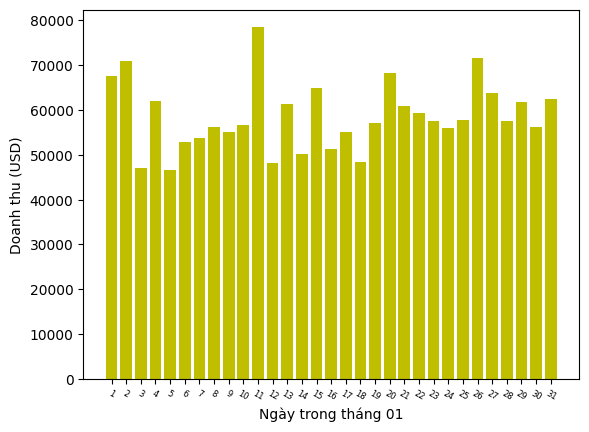

In [11]:
date=range(1,32)
plt.bar(x=date, height=sales_value, color='y')
plt.xticks(date, rotation=-30, size=6)
plt.xlabel('Ngày trong tháng 01')
plt.ylabel('Doanh thu (USD)')
plt.show()

Theo biểu đồ cột cho thấy, ngày 11 là ngày có đơn hàng cao nhất tương ứng với 78.414 USD và ngày 5 là ngày có đơn hàng đạt doanh số thấp nhất (46.524 USD)

### 2. Thành phố nào có doanh số cao nhất?

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Date
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",25


In [13]:
address_to_city=lambda address:address.split(',')[1]
df['City']=df['Purchase Address'].apply(address_to_city)
df.head()
#Sau khi định nghĩa xong hàm thì dùng apply trong pd để áp dụng hàm này lên toàn bộ cột Purchase Address và gán vào cột mới tạo tên City

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Date,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,Austin


In [14]:
sales_value_cities=df.groupby('City').sum()['Sales']
sales_value_cities.max()


433103.4375

In [15]:
sales_value_cities.min()

87587.078125

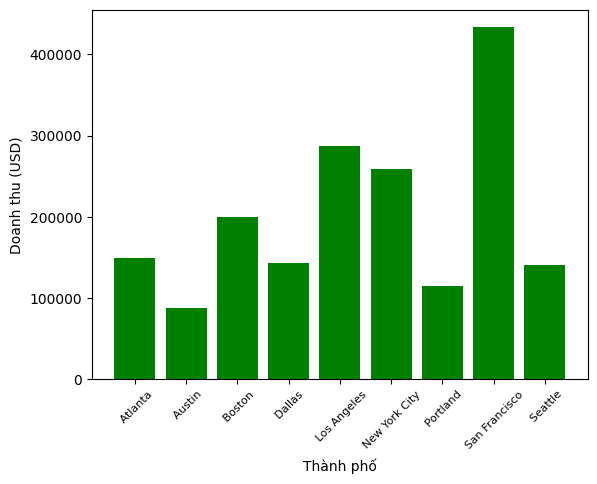

In [16]:
cities=df['City'].unique()
plt.bar(x=sorted(cities), height=sales_value_cities, color='g')
plt.xticks(cities, rotation=45,size=8)
plt.xlabel('Thành phố')
plt.ylabel('Doanh thu (USD)')
plt.show()
#Do tên của tp và dữ liệu đang ko khớp nên bị sai lệch nên dùng hàm này để chỉnh lại thứ tự thành phố
#Vậy có thể thấy theo biểu đồ, thành phố có số lượng đơn hàng nhiều nhất sẽ là thành phố San Francisco (433103.4375 USD) và nhỏ nhất là thành phố Austin (87587.078125 USD) 

### 3. Doanh nghiệp nên chạy quảng cáo vào thời gian nào thì có nhiều đơn hàng nhất (nhấn mạnh là đơn hàng ko phải doanh thu)?

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Date,City
0,141234,iPhone,1,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",22,Boston
1,141235,Lightning Charging Cable,1,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",28,Portland
2,141236,Wired Headphones,2,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",17,San Francisco
3,141237,27in FHD Monitor,1,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",05,Los Angeles
4,141238,Wired Headphones,1,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",25,Austin


In [18]:
df['Order Date']=pd.to_datetime(df['Order Date'])
#Chuyển dữ liệu từ object sang datetime

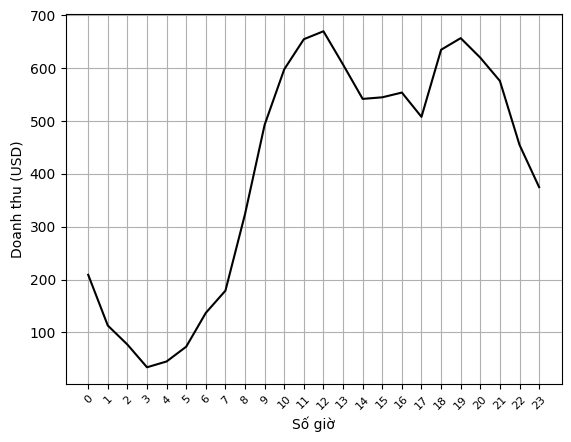

In [19]:
df['Hours']=df['Order Date'].dt.hour
sales_value_hours=df.groupby('Hours').count()['Sales']
hours=[hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours, color='black')
plt.grid()
plt.xticks(hours, rotation=45,size=8)
plt.xlabel('Số giờ')
plt.ylabel('Doanh thu (USD)')
plt.show()

#Chỉ đếm số đơn chứ ko tính doanh thu
#Nhận xét: số đơn hàng tăng cao vào khoảng 11-12h trưa (giờ nghỉ trưa) và tiếp tục tăng cao vào 19h (sau khi đi làm về)
#Giải pháp: có thể chạy quảng cáo trước đó 30-60p là hiệu quả nhất

### 4. Những sản phẩm nào thường đc bán cùng nhau

In [20]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Date,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",22,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",28,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",17,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",05,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",25,Austin,11


In [21]:
df_dup=df[df['Order ID'].duplicated(keep=False)]
df_dup['All Products']=df_dup.groupby('Order ID')['Product'].transform(','.join)
df_dup.head()

#Check những sp có cùng Order ID tức là có nhiều sp dc mua cùng lúc trong đơn hàng đó

C:\Users\Mang Mang\AppData\Local\Temp\ipykernel_3380\977540475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products']=df_dup.groupby('Order ID')['Product'].transform(','.join)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Date,City,Hours,All Products
41,141275,USB-C Charging Cable,1,11.95,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",07,Austin,16,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",07,Austin,16,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",02,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,11.52,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",02,Los Angeles,8,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",10,New York City,11,"Vareebadd Phone,Wired Headphones"


In [22]:
df_dup=df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup

,Order ID,All Products
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
9500,150287,"iPhone,Lightning Charging Cable"
9517,150303,"iPhone,Lightning Charging Cable"
9538,150323,"Google Phone,USB-C Charging Cable,Apple Airpod..."
9552,150335,"iPhone,Apple Airpods Headphones"


In [23]:
from itertools import combinations
from collections import Counter

count = Counter()

for products in df_dup['All Products']:
    product_list = products.split(",")
    count.update(Counter(combinations(product_list, 2)))

print(count)

#Dùng cái này để tạo 1 đơn hàng thành list sau đó lấy lấy list of lists: tức là trong 1 list thì sẽ có thể có cặp list nhỏ khác.

#Tham khảo trong stackoverflow https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

Counter({('Google Phone', 'USB-C Charging Cable'): 62, ('iPhone', 'Lightning Charging Cable'): 60, ('iPhone', 'Wired Headphones'): 35, ('Google Phone', 'Wired Headphones'): 31, ('Vareebadd Phone', 'USB-C Charging Cable'): 21, ('USB-C Charging Cable', 'Wired Headphones'): 19, ('iPhone', 'Apple Airpods Headphones'): 16, ('Vareebadd Phone', 'Wired Headphones'): 10, ('Google Phone', 'Bose SoundSport Headphones'): 8, ('USB-C Charging Cable', 'Bose SoundSport Headphones'): 6, ('Lightning Charging Cable', 'Wired Headphones'): 5, ('Lightning Charging Cable', 'Apple Airpods Headphones'): 5, ('Bose SoundSport Headphones', 'Wired Headphones'): 4, ('Apple Airpods Headphones', 'USB-C Charging Cable'): 4, ('USB-C Charging Cable', 'AA Batteries (4-pack)'): 4, ('AAA Batteries (4-pack)', 'USB-C Charging Cable'): 4, ('20in Monitor', 'Wired Headphones'): 3, ('Apple Airpods Headphones', 'iPhone'): 3, ('Lightning Charging Cable', 'USB-C Charging Cable'): 3, ('USB-C Charging Cable', 'iPhone'): 3, ('Wired He

In [24]:
for key, value in count.most_common(10):

    print(key, value)
    
#Key là tên sp, value là số lượng
#Vậy có thể thấy 'Google Phone', 'USB-C Charging Cable' hoặc 
#'iPhone', 'Lightning Charging Cable' DN có thể bán sp theo combo kèm với 1 sp nữa bán chạy hơn để 
#đẩy mạnh doanh số đi kèm kia hoặc đính kèm giảm giá khi mua 2 sp này để kích cầu tiêu dùng

('Google Phone', 'USB-C Charging Cable') 62
('iPhone', 'Lightning Charging Cable') 60
('iPhone', 'Wired Headphones') 35
('Google Phone', 'Wired Headphones') 31
('Vareebadd Phone', 'USB-C Charging Cable') 21
('USB-C Charging Cable', 'Wired Headphones') 19
('iPhone', 'Apple Airpods Headphones') 16
('Vareebadd Phone', 'Wired Headphones') 10
('Google Phone', 'Bose SoundSport Headphones') 8
('USB-C Charging Cable', 'Bose SoundSport Headphones') 6


### 5. Sản phẩm nào được bán nhiều nhất? và giả thuyết tại sao sản phẩm này được bán nhiều nhất?

In [25]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Date,City,Hours
0,141234,iPhone,1,700.000000,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",22,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",28,Portland,14
2,141236,Wired Headphones,2,11.990000,23.980000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",17,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",05,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",25,Austin,11


In [26]:
all_products=df.groupby('Product').sum()['Quantity Ordered']
all_products

Product
20in Monitor                   215.0
27in 4K Gaming Monitor         312.0
27in FHD Monitor               419.0
34in Ultrawide Monitor         314.0
AA Batteries (4-pack)         1425.0
AAA Batteries (4-pack)        1596.0
Apple Airpods Headphones       814.0
Bose SoundSport Headphones     659.0
Flatscreen TV                  243.0
Google Phone                   318.0
LG Dryer                        39.0
LG Washing Machine              42.0
Lightning Charging Cable      1151.0
Macbook Pro Laptop             235.0
ThinkPad Laptop                217.0
USB-C Charging Cable          1284.0
Vareebadd Phone                125.0
Wired Headphones              1081.0
iPhone                         379.0
Name: Quantity Ordered, dtype: float64

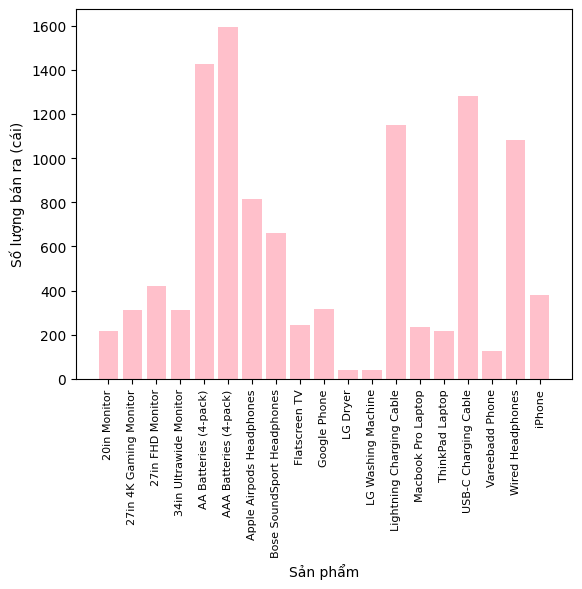

In [27]:
products_1=[product for product, quant in all_products.items()]
plt.bar(x=products_1, height=all_products, color='pink')
plt.xticks(products_1, rotation=90,size=8)
plt.xlabel('Sản phẩm')
plt.ylabel('Số lượng bán ra (cái)')
plt.show()
#sp bán đc nhiều nhất là AAA Batteries (4-pack) 1596 (chiếc), 
#và sau nó là AA Batteries (4-pack) 1425 (chiếc)

##### Tại sao sp này bán đc nhiều?
+ giá cả

In [28]:
prices=df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.989998
27in 4K Gaming Monitor         389.989990
27in FHD Monitor               149.990005
34in Ultrawide Monitor         379.989990
AA Batteries (4-pack)            3.840000
AAA Batteries (4-pack)           2.990000
Apple Airpods Headphones       150.000000
Bose SoundSport Headphones      99.989998
Flatscreen TV                  300.000000
Google Phone                   600.000000
LG Dryer                       600.000000
LG Washing Machine             600.000000
Lightning Charging Cable        14.950000
Macbook Pro Laptop            1700.000000
ThinkPad Laptop                999.989990
USB-C Charging Cable            11.950000
Vareebadd Phone                400.000000
Wired Headphones                11.990000
iPhone                         700.000000
Name: Price Each, dtype: float32

C:\Users\Mang Mang\AppData\Local\Temp\ipykernel_3380\783806530.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_1, rotation=90, size =8)


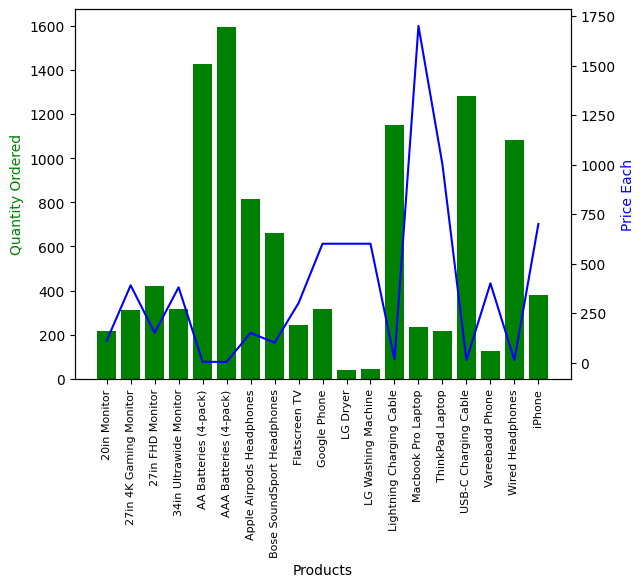

In [29]:
x= products_1
y1=all_products
y2= prices

fig,ax1= plt.subplots()

ax2=ax1.twinx()
ax1.bar(x,y1, color='g')
ax2.plot(x,y2, color='b')
ax1.set_xticklabels(products_1, rotation=90, size =8)

ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price Each', color='b')


plt.show()

#Sp có giá thấp là AAA Batteries (4-pack) và AAA Batteries (4-pack) nhưng bán đc số lượng nhiều hơn, và ngược lại 
#những sp có giá cao thì lượt bán lại thấp, tuy nhiên 2 sp của LG có mức giá ko quá cao nhưng lượt bán lại rất thấp 
#Có thể do ảnh hưởng của yếu tố thương hiệu